In [1]:
# imports
import os
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import cv2 
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
import json

In [11]:
img = cv2.imread('./data/testimage1.jpeg')
# img = remove_noise(img)
# img = canny(img)

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'“Ladlsolzo | aitaolao lel losaso teat | | tn | saseton | 2\n| sil solzo } ial a0 fae | losset ire | | | a aaco loo |\n\n9 sulsolzotadaotea Led alesear mec. Lah 26eelool a.\n4 iltoleotatsoleo teil tessa too | te poss loads\nSL astral: viiolee Lait lesaaz toe | | tt a | p99 too Ly\nGl of alan | aa apse Lael. lesen Toe | | |b wy 7 yebe la _\n\x0c'

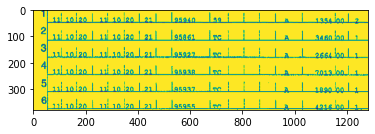

-

 

 

 

 

0 4
1110201310021 5964. 1

21204202-98822 664400-1.4..
-

1 1
7 12900

 

 

 

 

 

 

 

 

 

 

1

 

5

 



In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
ret, BW = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)

plt.imshow(BW)
plt.show()

print(pytesseract.image_to_string(img,config='digits --oem 3 --psm 6'))

In [4]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)